## Iterate over multiple pages

In [573]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
import time

import os

chromedriver = f"{os.environ['HOME']}/.local/bin/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)
driver.get("https://www.rent.com/washington/seattle/apartments_condos_houses_townhousesz")

In [574]:
import requests
from bs4 import BeautifulSoup

In [575]:
soup = BeautifulSoup(driver.page_source,'html.parser')

In [5]:
for link in soup.find_all('a'): 
    print(link.prettify())

<a class="_1A89X" href="/">
 <span class="_2owZk _1VdGE" data-tid="rent-logo">
  <svg data-tid="rent-logo" fill="#FFF" fill-rule="evenodd" viewbox="0 0 146 24" xmlns="http://www.w3.org/2000/svg">
   <path d="M11.285 4.471a7.636 7.636 0 0 0-1.184-.094c-1.71 0-3.265.596-4.46 1.694v-.92a.339.339 0 0 0-.344-.335h-4.5c-.19 0-.343.15-.343.334v17.954c0 .184.153.334.342.334h4.718c.189 0 .342-.15.342-.334v-8.82c0-1.277.13-2.712 1.09-3.678.885-.925 2.183-1.238 4.246-1.01a.348.348 0 0 0 .268-.083.332.332 0 0 0 .114-.25V4.801a.337.337 0 0 0-.289-.33M21.78 9.074c1.95 0 3.5 1.041 4.141 2.748H17.73c.724-1.707 2.24-2.748 4.05-2.748m7.09-1.786C27.105 5.4 24.601 4.36 21.814 4.36c-5.393 0-9.78 4.389-9.78 9.784 0 5.354 4.387 9.71 9.78 9.71 4.158 0 7.486-2.04 8.903-5.455a.33.33 0 0 0-.033-.313.345.345 0 0 0-.285-.147h-5.405a.347.347 0 0 0-.243.098c-.73.712-1.786 1.105-2.972 1.105-1.927 0-3.48-1.094-4.143-2.885H31.07a.34.34 0 0 0 .342-.304c.337-3.529-.542-6.525-2.542-8.666M43.146 4.36c-1.678 0-3.187.583-4.4

In [577]:
for link in soup.find_all(class_="_1YEFs _3g223"): 
    print(link['href'])


/washington/seattle-apartments/rivet-apartments-4-100063098
/washington/seattle-apartments/broadstone-lexington-4-100067124
/washington/seattle-apartments/harbor-steps-4-450414
/washington/seattle-apartments/the-post-4-54561773
/washington/seattle-apartments/cyrene-4-100063102
/washington/seattle-apartments/west-edge-4-100067008
/washington/seattle-apartments/coppins-well-4-50395798
/washington/seattle-apartments/addison-on-fourth-4-53527778
/washington/seattle-apartments/tower-801-4-438143
/washington/seattle-apartments/helios-4-100064999
/washington/seattle-apartments/the-olivian-4-3241763
/washington/seattle-apartments/batik-4-100066847
/washington/seattle-apartments/viktoria-apartments-4-63968222
/washington/seattle-apartments/excelsior-4-100060646
/washington/seattle-apartments/ava-capitol-hill-4-100056373
/washington/seattle-apartments/tower-12-4-100062251
/washington/seattle-apartments/pike-motorworks-4-100056606
/washington/seattle-apartments/aspira-4-4325767
/washington/seattl

In [578]:
for link in soup.find_all(class_="_1YEFs _3g223"): 
    driver.get("http://rent.com"+link['href'])
    time.sleep(1)

## Scrap only one page with BeautifulSoup

In [21]:
url = "https://www.realtor.com/realestateandhomes-detail/8228-Green-Lake-Dr-N_Seattle_WA_98103_M15054-08053"
response = requests.get(url)

In [22]:
response.status_code

200

In [23]:
page = response.text

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://static.rdc-next-basecamp.rdc.moveaws.com/assets/favicon-144287b492113455703667bc3182768a9b2666765a1cd4beba38cfe40294eccc.ico" rel="shortcut icon" type="image/x-icon"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=com.move.realtor" name="google-play-app"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
  <meta content="Check out this pet-friendly at CREW Apartments located at 8228 Green Lake Dr N, Seattle, WA 98103 that includes 0 - 2 bed, 1 - 2 bath, and 372 - 751 Sq. Ft." name="description"/>
  <meta content="35368227870" property="fb:pages"/>
  <meta content="authenticity_token" name="csrf-param"/>
  <meta content="n4fOom8XHglWOgyjebMGfCYiTuQtjx3/JD/9MzAowrT5wI0ciPEu7NaGJetLf3jvquATV1k9p4WLM7yzQ5515g==" name="csrf-token"/>
  <meta content="" property="og:title"/>
  <meta content="realtor.com®" property="og:site_name"/>
  <meta 
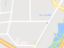
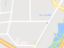

In [24]:
soup1 = BeautifulSoup(page,"html5lib" )
print(soup1.prettify())

In [98]:
for content in soup1.find(id="content-floorplan-studio"):
    print(content)


            
<div class="load-more-rental-floorplan load-more-trigger">
              <table class="table table-noheader table-condensed no-margin">
                <tbody>
                  <tr>
                    <td class="col-name hidden-xs hidden-xxs">
                      Cambridge
                    </td>
                    <td class="col-bath text-right">1 ba</td>
                    	<td class="col-sqft text-right">
                    	    430 sq ft
                    	</td>
                    <td class="col-price text-right">$1,619</td>
                    <td class="col-availability text-right">
                      <a class="check-availability-cta" data-floorplan="6342906" data-omtag="ldp:rentals:floor-plans:check-availability" data-property="true" data-target="#modal-rental-floorplan" data-toggle="modal" href="#">Available</a>
                    </td>
                  </tr>
                  <tr>
                    <td class="col-name hidden-xs hidden-xxs">
   

In [42]:
import pandas as pd 
import numpy as np

In [95]:
df = pd.DataFrame(columns=['room_type','bath','sqft','price'])
df

,room_type,bath,sqft,price


In [96]:
for row in content.find_all('tr'):
    name = 'studio'
    bath = int(row.find(class_="col-bath").text.strip()[0])
    sqft = int(row.find(class_="col-sqft").text.strip().split()[0])
    price = row.find(class_="col-price").text.strip()
    price = int(price.replace('$','').replace(',',''))
    temp = [name,bath,sqft,price]
    print(temp)
    df = df.append(pd.DataFrame([temp],columns=['room_type','bath','sqft','price']),ignore_index=True)
df

['studio', 1, 430, 1619]
['studio', 1, 433, 1595]
['studio', 1, 372, 1640]
['studio', 1, 456, 1725]
['studio', 1, 495, 1999]
['studio', 1, 498, 1710]
['studio', 1, 508, 1610]


,room_type,bath,sqft,price
0,studio,1,430,1619
1,studio,1,433,1595
2,studio,1,372,1640
3,studio,1,456,1725
4,studio,1,495,1999
5,studio,1,498,1710
6,studio,1,508,1610


In [91]:
df

,name,bath,sqft,price
0,Cambridge,1 ba,430 sq ft,"$1,619"
1,Durham,1 ba,433 sq ft,"$1,595"
2,London,1 ba,372 sq ft,"$1,640"
3,Newcastle,1 ba,456 sq ft,"$1,725"
4,Live Works,1 ba,495 sq ft,"$1,999"
5,Glasgow,1 ba,498 sq ft,"$1,710"
6,Edinburgh,1 ba,508 sq ft,"$1,610"
7,Cambridge,1 ba,430 sq ft,"$1,619"
8,Durham,1 ba,433 sq ft,"$1,595"
9,London,1 ba,372 sq ft,"$1,640"


In [141]:
def floorplan_scrapper(room_type):
    content = soup1.find(id=room_type)
    
    df = pd.DataFrame(columns=['room_type','bath','sqft','price'])
    
    for row in content.find_all('tr'):
        name = room_type.replace('floorplan-','')
        bath = float(row.find(class_="col-bath").text.strip()[0])
        sqft = float(row.find(class_="col-sqft").text.strip().split()[0])
        price = row.find(class_="col-price").text.strip()
        price = float(price.replace('$','').replace(',',''))
        temp = [name,bath,sqft,price]
        df = df.append(pd.DataFrame([temp],columns=['room_type','bath','sqft','price']),ignore_index=True)
        
    return df

In [142]:
ids = []
floorplan=soup1.find(class_="list-floorplans")
for panel in floorplan.find_all(class_="panel"):
    ids.append(panel["id"])

In [143]:
ids

['floorplan-studio', 'floorplan-1-bedroom', 'floorplan-2-bedroom']

In [200]:
def floorplan_scrapper1():
    ids = []
    floorplan=soup1.find(class_="list-floorplans")
    for panel in floorplan.find_all(class_="panel"):
        ids.append(panel["id"])
    
    df = pd.DataFrame(columns=['room_type','bath','sqft','price'])
    for id_ in ids:
        df = df.append(floorplan_scrapper(id_),ignore_index=True)
        
    return df

In [201]:
df_floorplan = floorplan_scrapper1()

In [202]:
df_floorplan

,room_type,bath,sqft,price
0,studio,1.0,430.0,1619.0
1,studio,1.0,433.0,1595.0
2,studio,1.0,372.0,1640.0
3,studio,1.0,456.0,1725.0
4,studio,1.0,495.0,1999.0
5,studio,1.0,498.0,1710.0
6,studio,1.0,508.0,1610.0
7,1-bedroom,1.0,596.0,1829.0
8,1-bedroom,1.0,513.0,1820.0
9,1-bedroom,1.0,563.0,1699.0


In [269]:
overview=soup1.find(class_="listing-subsection-overview")
items = overview.find_all(class_="ldp-key-fact-item")

In [273]:
traits=[]
for item in items:
    traits.append(item.text.split())
traits

[['Type', 'Apartment'], ['Built', '2018']]

In [383]:
df_trait = pd.DataFrame(traits)
df_trait = df_trait.transpose()
headers=df_trait.iloc[0]
df_trait=df_trait.iloc[1:]
df_trait.rename(columns=headers, inplace=True)
df_trait.index = df_trait.reset_index().index
df_trait

,Type,Built
0,Apartment,2018


In [418]:
def get_address_str(address):
    a = address.text.strip().split('\n')[1:]
    b = []
    for add in a:
        b.append(add.strip())
    return ' '.join(b)

In [420]:
address = soup1.find(class_="ldp-header-address ").find(class_="display-inline")
name = address.text.strip().split('\n')[0]
df_trait["Address"] = get_address_str(address)
df_trait["Name"] = name
df_trait

,Type,Built,Address,Name
0,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments


In [421]:
def get_features_list(list_a):    
    la = []
    for l in list_a:
        la.append(l.text.strip().split('\n'))
    lb = []
    for l in la:
        lbb = []
        for ll in l:
            lbb.append(ll.strip())
        lb.append(lbb)
    return lb

In [422]:
section = soup1.find(class_="listing-subsection-features")
items = section.find_all(class_="title-subsection-sm")
list1 = get_features_list(section.find_all(class_="col-sm-6"))

headers=[]
for item in items:
    headers.append(item.text.strip())
df_feature = pd.DataFrame(columns=headers)
df_feature.astype(object)
df_feature[headers[0]] = [list1[0]+list1[1]]
df_feature[headers[1]] = [list1[2]+list1[3]]
df_feature

,Community Features,Unit Features
0,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil..."


In [423]:
df = pd.concat([df_trait,df_feature],axis=1)

In [427]:
df 

,Type,Built,Address,Name,Community Features,Unit Features
0,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil..."


In [430]:
school = soup1.find_all(class_="school-rating")

In [451]:
rating_list = []
for s in school:
    rating_list.append(s.text)
df["School"] = [rating_list]
df

,Type,Built,Address,Name,Community Features,Unit Features,School
0,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]"


In [457]:
from collections import defaultdict
dict_floorplan = defaultdict(list)
for col in df_floorplan.columns:
    dict_floorplan[col] = df_floorplan[col]
dict_floorplan

defaultdict(list, {'room_type': 0        studio
             1        studio
             2        studio
             3        studio
             4        studio
             5        studio
             6        studio
             7     1-bedroom
             8     1-bedroom
             9     1-bedroom
             10    1-bedroom
             11    1-bedroom
             12    1-bedroom
             13    1-bedroom
             14    1-bedroom
             15    1-bedroom
             16    2-bedroom
             Name: room_type, dtype: object, 'bath': 0     1.0
             1     1.0
             2     1.0
             3     1.0
             4     1.0
             5     1.0
             6     1.0
             7     1.0
             8     1.0
             9     1.0
             10    1.0
             11    1.0
             12    1.0
             13    1.0
             14    1.0
             15    1.0
             16    2.0
             Name: bath, dtype: float64, 'sqft': 0     43

In [546]:
df

,Type,Built,Address,Name,Community Features,Unit Features,School
0,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]"


In [552]:
df = pd.concat([df]*df_floorplan.shape[0], ignore_index=True)
df = pd.concat([df,df_floorplan], axis=1)
df

,Type,Built,Address,Name,Community Features,Unit Features,School,room_type,bath,sqft,price
0,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,430.0,1619.0
1,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,433.0,1595.0
2,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,372.0,1640.0
3,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,456.0,1725.0
4,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,495.0,1999.0
5,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,498.0,1710.0
6,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,508.0,1610.0
7,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",1-bedroom,1.0,596.0,1829.0
8,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",1-bedroom,1.0,513.0,1820.0
9,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",1-bedroom,1.0,563.0,1699.0


In [553]:
df = df.dropna(how='any')
df

,Type,Built,Address,Name,Community Features,Unit Features,School,room_type,bath,sqft,price
0,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,430.0,1619.0
1,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,433.0,1595.0
2,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,372.0,1640.0
3,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,456.0,1725.0
4,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,495.0,1999.0
5,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,498.0,1710.0
6,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,508.0,1610.0
7,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",1-bedroom,1.0,596.0,1829.0
8,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",1-bedroom,1.0,513.0,1820.0
9,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",1-bedroom,1.0,563.0,1699.0


In [554]:
nb = soup1.find_all(class_ = "neighborhood-flex-item")

In [559]:
nb_list = []
for nb1 in nb:
    nb_list.append(nb1.text.strip().split('\n'))
nb_list

[['$2,650', '            ', '            Median Rental Price'],
 ['$684,990', '                Median Listing Price'],
 ['Northwest Seattle', '              Median Rental: $2,395'],
 ['Northeast Seattle', '              Median Rental: $3,795'],
 ['Lake Union', '              Median Rental: N/A'],
 ['Ballard', '              Median Rental: $2,800']]

In [570]:
row_count = df.shape[0]
title1 = nb_list[0][-1].strip()
title2 = nb_list[1][-1].strip()
value1 = float(nb_list[0][0].replace('$','').replace(',',''))
value2 = float(nb_list[1][0].replace('$','').replace(',',''))

In [571]:
df[title1] = [value1] * row_count
df[title2] = [value2] * row_count
df

/Users/liuriguang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/liuriguang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Type,Built,Address,Name,Community Features,Unit Features,School,room_type,bath,sqft,price,Median Rental Price,Median Listing Price
0,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,430.0,1619.0,2650.0,684990.0
1,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,433.0,1595.0,2650.0,684990.0
2,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,372.0,1640.0,2650.0,684990.0
3,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,456.0,1725.0,2650.0,684990.0
4,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,495.0,1999.0,2650.0,684990.0
5,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,498.0,1710.0,2650.0,684990.0
6,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",studio,1.0,508.0,1610.0,2650.0,684990.0
7,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",1-bedroom,1.0,596.0,1829.0,2650.0,684990.0
8,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",1-bedroom,1.0,513.0,1820.0,2650.0,684990.0
9,Apartment,2018,"8228 Green Lake Dr N, Seattle, WA 98103",CREW Apartments,"[Balcony, Barbecue/Grill, Bike Storage, Bike S...","[Air Conditioning, Cable or Satellite TV, Ceil...","[7, NR, 10, NR, 6, NR, NR, NR]",1-bedroom,1.0,563.0,1699.0,2650.0,684990.0


In [572]:
df.shape

(17, 13)